In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")

In [3]:
alpha = 0.7
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 1000
max_steps = 100
Q = np.zeros((env.observation_space.n, env.action_space.n))
q_values_history = []

In [5]:
for episode in range(episodes):
    state = env.reset()[0]
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    done = False
    for step in range(max_steps):
        next_state, reward, done, _, _ = env.step(action)
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state])
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )
        state = next_state
        action = next_action
        if done:
            break
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    q_values_history.append(np.copy(Q))

/opt/anaconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


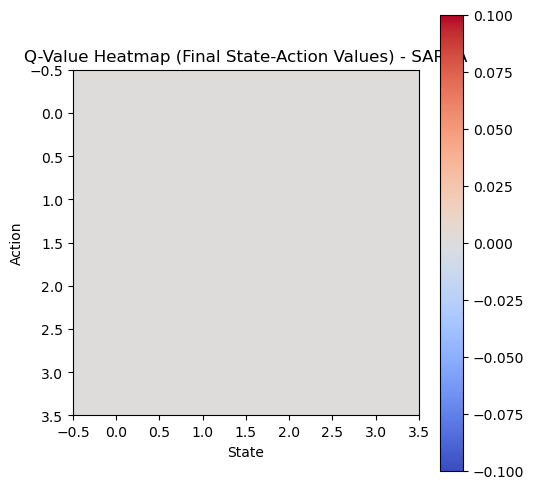

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
q_table = np.max(Q, axis=1).reshape((4, 4))
plt.imshow(q_table, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Q-Value Heatmap (Final State-Action Values) - SARSA")
plt.xlabel("State")
plt.ylabel("Action")
plt.tight_layout()
plt.show()

In [9]:
print("\nFinal Q-table:\n", Q)


Final Q-table:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [11]:
def record_video(env, Qtable, video_path, fps=2):
    frames = []
    reset_result = env.reset()
    state = reset_result if isinstance(reset_result, int) else reset_result[0]
    for _ in range(100):
        frames.append(env.render())
        action = np.argmax(Qtable[state])
        step_result = env.step(action)
        if len(step_result) == 4:
            state, _, done, _ = step_result
        else:
            state, _, done, _, _ = step_result
        if done:
            frames.append(env.render())
            break
    imageio.mimsave(video_path, frames, fps=fps)

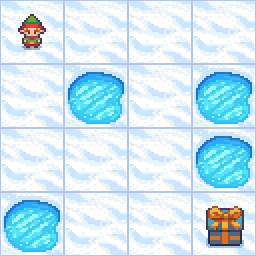

In [15]:
video_path = "sarsa_replay.gif"
record_video(env, Q, video_path, fps=2)
Image(video_path)